In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

In [2]:
school_funding = pd.read_csv('https://raw.githubusercontent.com/aalilyah/DS4a/main/School%20Funding%20Per%20Pupil.csv')

# correlation between funding and math test 
# rename column name: no spaces between funding and underscore, 

school_funding.head(100000) 

,dbn,school_name,state_and_local_funding_per_pupil,federal_funding _per_pupil,total_school_funding_per_pupil,fiscal_year
0,01M034,P.S. 034 Franklin D. Roosevelt,23354.48059,2628.748571,34560.00442,2022
1,01M034,P.S. 034 Franklin D. Roosevelt,24312.26568,2116.509225,33171.01197,2021
2,01M034,P.S. 034 Franklin D. Roosevelt,22640.04346,1325.33218,30688.75153,2020
3,01M034,P.S. 034 Franklin D. Roosevelt,21637.63,1570.43,29882.06,2019
4,01M034,P.S. 034 Franklin D. Roosevelt,21469.28737,1303.630631,29337.10165,2018
...,...,...,...,...,...,...
2337,32K562,Evergreen Middle School for Urban Exploration,18346.87835,1744.708993,28668.3626,2022
2338,32K562,Evergreen Middle School for Urban Exploration,19124.24553,1412.475783,27278.95837,2021
2339,32K562,Evergreen Middle School for Urban Exploration,18348.24693,1087.642659,26159.26547,2020
2340,32K562,Evergreen Middle School for Urban Exploration,17361.15,943.2,24978.35,2019


In [3]:
# Changing the columns to appropriate types
school_funding["dbn"]=school_funding["dbn"].apply(str)
school_funding["school_name"]=school_funding["school_name"].apply(str)
school_funding=school_funding.rename(columns = {'federal_funding _per_pupil':'federal_funding_per_pupil'})

school_funding['state_and_local_funding_per_pupil'] = school_funding['state_and_local_funding_per_pupil'].apply(lambda x: x.replace('$', ''))
school_funding['state_and_local_funding_per_pupil'] = school_funding['state_and_local_funding_per_pupil'].apply(lambda x: x.replace(',', ''))
school_funding['state_and_local_funding_per_pupil'] = pd.to_numeric(school_funding['state_and_local_funding_per_pupil'])

school_funding['federal_funding_per_pupil'] = school_funding['federal_funding_per_pupil'].apply(lambda x: x.replace('$', ''))
school_funding['federal_funding_per_pupil'] = school_funding['federal_funding_per_pupil'].apply(lambda x: x.replace(',', ''))
school_funding['federal_funding_per_pupil'] = pd.to_numeric(school_funding['federal_funding_per_pupil'])

school_funding['total_school_funding_per_pupil'] = school_funding['total_school_funding_per_pupil'].apply(lambda x: x.replace('$', ''))
school_funding['total_school_funding_per_pupil'] = school_funding['total_school_funding_per_pupil'].apply(lambda x: x.replace(',', ''))
school_funding['total_school_funding_per_pupil'] = pd.to_numeric(school_funding['total_school_funding_per_pupil'])


In [4]:
school_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   dbn                                2342 non-null   object 
 1   school_name                        2342 non-null   object 
 2   state_and_local_funding_per_pupil  2342 non-null   float64
 3   federal_funding_per_pupil          2342 non-null   float64
 4   total_school_funding_per_pupil     2342 non-null   float64
 5   fiscal_year                        2342 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 109.9+ KB


In [5]:
math_result = pd.read_csv('https://raw.githubusercontent.com/aalilyah/DS4a/main/Math_Results_2015-2022.csv?token=GHSAT0AAAAAAB36Q6STR46FK76PVSR3PUISY4NGP7Q')

math_result.head(100000)

,School_DBN,School_Name,Grade,Year,Category,Number_Tested,Mean_Scale_Score,Number_Level_1,Percentage_Level_1,Number_Level_2,Percentage_Level_2,Number_Level_3,Percentage_Level_3,Number_Level_4,Percentage_Level_4,Number_Level_3+4,Percentage_Level_3+4
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2016,All Students,21,275,13,61.9,4,19,4,19,0,0,4,19
1,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,All Students,29,302,8,27.6,9,31,7,24.1,5,17.2,12,41.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,3,2018,All Students,20,616,1,5,0,0,9,45,10,50,19,95
3,01M015,P.S. 015 ROBERTO CLEMENTE,3,2019,All Students,26,606,4,15.4,4,15.4,8,30.8,10,38.5,18,69.2
4,01M015,P.S. 015 ROBERTO CLEMENTE,3,2022,All Students,21,583,12,57.1,4,19,5,23.8,0,0,5,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24954,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2016,All Students,269,270,176,65.4,85,31.6,6,2.2,2,0.7,8,3
24955,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2017,All Students,294,269,206,70.1,74,25.2,9,3.1,5,1.7,14,4.8
24956,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2018,All Students,225,588,119,52.9,71,31.6,31,13.8,4,1.8,35,15.6
24957,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2019,All Students,332,591,166,50,100,30.1,57,17.2,9,2.7,66,19.9


In [6]:
# 0   School_DBN            24959 non-null  object (string)
#  1   School_Name           24959 non-null  object (string)
#  2   Grade                 24959 non-null  object int
#  3   Year                  24959 non-null  int64  
#  4   Category              24959 non-null  object string
#  5   Number_Tested         24959 non-null  int64  
#  6   Mean_Scale_Score      24959 non-null  object (rest are all floats)
#  7   Number_Level_1        24959 non-null  object
#  8   Percentage_Level_1    24959 non-null  object
#  9   Number_Level_2        24959 non-null  object
#  10  Percentage_Level_2    24959 non-null  object
#  11  Number_Level_3        24959 non-null  object
#  12  Percentage_Level_3    24959 non-null  object
#  13  Number_Level_4        24959 non-null  object
#  14  Percentage_Level_4    24959 non-null  object
#  15  Number_Level_3+4      24959 non-null  object
#  16  Percentage_Level_3+4  24959 non-null  object

# Changing the columns to appropriate types

math_result["School_DBN"]=math_result["School_DBN"].apply(str)
math_result["School_Name"]=math_result["School_Name"].apply(str)
math_result["Grade"] = math_result["Grade"].apply(lambda x: x.replace('All Grades', '10'))
math_result["Grade"] = math_result["Grade"].astype(float)
math_result["Category"] = math_result["Category"].apply(str)

# print(math_result["Mean_Scale_Score"].unique())
math_result= math_result.apply(lambda x: x.replace('s', ''))

# math_result["Mean_Scale_Score"]= math_result["Mean_Scale_Score"].apply(lambda x: x.replace('s', ''))
math_result["Mean_Scale_Score"]= pd.to_numeric(math_result["Mean_Scale_Score"])

# math_result["Number_Level_1"]= math_result["Number_Level_1"].apply(lambda x: x.replace('s', ''))
math_result["Number_Level_1"]= pd.to_numeric(math_result["Number_Level_1"])

# math_result["Percentage_Level_1"]= math_result["Percentage_Level_1"].apply(lambda x: x.replace('s', ''))
math_result["Percentage_Level_1"]= pd.to_numeric(math_result["Percentage_Level_1"])

math_result["Number_Level_2"]= pd.to_numeric(math_result["Number_Level_2"])
math_result["Percentage_Level_2"]= pd.to_numeric(math_result["Percentage_Level_2"])

math_result["Number_Level_3"]= pd.to_numeric(math_result["Number_Level_3"])

math_result["Percentage_Level_3"]= pd.to_numeric(math_result["Percentage_Level_3"])

math_result["Number_Level_4"]= pd.to_numeric(math_result["Number_Level_4"])

math_result["Percentage_Level_4"]= pd.to_numeric(math_result["Percentage_Level_4"])

math_result["Number_Level_3+4"]= pd.to_numeric(math_result["Number_Level_3+4"])

math_result["Percentage_Level_3+4"]= pd.to_numeric(math_result["Percentage_Level_3+4"])

#math_result= math_result[(math_result.Grade == 6) | (math_result.Grade == 7) | (math_result.Grade == 8)]
#math_resultx.head()
#math_result.drop(math_result.index[math_result['Grade'] == 6], inplace = True)
#math_result = math_result[math_result.Year !=3] # drop grades except 6,7, or 8
#math_result
math_result = math_result[(math_result.Grade == 6) | (math_result.Grade == 7) | (math_result.Grade == 8)]


math_result.head(100000)


,School_DBN,School_Name,Grade,Year,Category,Number_Tested,Mean_Scale_Score,Number_Level_1,Percentage_Level_1,Number_Level_2,Percentage_Level_2,Number_Level_3,Percentage_Level_3,Number_Level_4,Percentage_Level_4,Number_Level_3+4,Percentage_Level_3+4
75,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,2015,All Students,56,295.0,19.0,33.9,23.0,41.1,11.0,19.6,3.0,5.4,14.0,25.0
76,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,2016,All Students,54,285.0,22.0,40.7,25.0,46.3,4.0,7.4,3.0,5.6,7.0,13.0
77,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,2017,All Students,29,297.0,9.0,31.0,13.0,44.8,4.0,13.8,3.0,10.3,7.0,24.1
78,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,2018,All Students,33,588.0,20.0,60.6,8.0,24.2,5.0,15.2,0.0,0.0,5.0,15.2
79,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,2019,All Students,38,586.0,22.0,57.9,8.0,21.1,8.0,21.1,0.0,0.0,8.0,21.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24949,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,7.0,2022,All Students,100,584.0,62.0,62.0,28.0,28.0,8.0,8.0,2.0,2.0,10.0,10.0
24950,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,8.0,2015,All Students,128,268.0,97.0,75.8,31.0,24.2,0.0,0.0,0.0,0.0,0.0,0.0
24951,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,8.0,2016,All Students,91,274.0,55.0,60.4,33.0,36.3,3.0,3.3,0.0,0.0,3.0,3.3
24952,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,8.0,2017,All Students,88,268.0,59.0,67.0,25.0,28.4,3.0,3.4,1.0,1.1,4.0,4.5


In [7]:
math_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8107 entries, 75 to 24953
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   School_DBN            8107 non-null   object 
 1   School_Name           8107 non-null   object 
 2   Grade                 8107 non-null   float64
 3   Year                  8107 non-null   int64  
 4   Category              8107 non-null   object 
 5   Number_Tested         8107 non-null   int64  
 6   Mean_Scale_Score      8028 non-null   float64
 7   Number_Level_1        8028 non-null   float64
 8   Percentage_Level_1    8028 non-null   float64
 9   Number_Level_2        8028 non-null   float64
 10  Percentage_Level_2    8028 non-null   float64
 11  Number_Level_3        8028 non-null   float64
 12  Percentage_Level_3    8028 non-null   float64
 13  Number_Level_4        8028 non-null   float64
 14  Percentage_Level_4    8028 non-null   float64
 15  Number_Level_3+4   

In [8]:
math_result=math_result.rename(columns = {'School_DBN':'dbn'})
math_result=math_result.rename(columns = {'Grade':'grade'})
math_result=math_result.rename(columns = {'Year':'fiscal_year'})

math_result.head()

,dbn,School_Name,grade,fiscal_year,Category,Number_Tested,Mean_Scale_Score,Number_Level_1,Percentage_Level_1,Number_Level_2,Percentage_Level_2,Number_Level_3,Percentage_Level_3,Number_Level_4,Percentage_Level_4,Number_Level_3+4,Percentage_Level_3+4
75,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,2015,All Students,56,295.0,19.0,33.9,23.0,41.1,11.0,19.6,3.0,5.4,14.0,25.0
76,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,2016,All Students,54,285.0,22.0,40.7,25.0,46.3,4.0,7.4,3.0,5.6,7.0,13.0
77,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,2017,All Students,29,297.0,9.0,31.0,13.0,44.8,4.0,13.8,3.0,10.3,7.0,24.1
78,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,2018,All Students,33,588.0,20.0,60.6,8.0,24.2,5.0,15.2,0.0,0.0,5.0,15.2
79,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,2019,All Students,38,586.0,22.0,57.9,8.0,21.1,8.0,21.1,0.0,0.0,8.0,21.1


In [9]:
# combined = pd.merge(school_funding, math_result, on = "dbn")
combined = pd.merge(school_funding,math_result, how='left' , left_on =['dbn','fiscal_year'], right_on= ['dbn','fiscal_year'])
combined.head(100000)

,dbn,school_name,state_and_local_funding_per_pupil,federal_funding_per_pupil,total_school_funding_per_pupil,fiscal_year,School_Name,grade,Category,Number_Tested,...,Number_Level_1,Percentage_Level_1,Number_Level_2,Percentage_Level_2,Number_Level_3,Percentage_Level_3,Number_Level_4,Percentage_Level_4,Number_Level_3+4,Percentage_Level_3+4
0,01M034,P.S. 034 Franklin D. Roosevelt,23354.48059,2628.748571,34560.00442,2022,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,All Students,23.0,...,13.0,56.5,5.0,21.7,4.0,17.4,1.0,4.3,5.0,21.7
1,01M034,P.S. 034 Franklin D. Roosevelt,23354.48059,2628.748571,34560.00442,2022,P.S. 034 FRANKLIN D. ROOSEVELT,7.0,All Students,42.0,...,35.0,83.3,5.0,11.9,2.0,4.8,0.0,0.0,2.0,4.8
2,01M034,P.S. 034 Franklin D. Roosevelt,24312.26568,2116.509225,33171.01197,2021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,P.S. 034 Franklin D. Roosevelt,22640.04346,1325.332180,30688.75153,2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M034,P.S. 034 Franklin D. Roosevelt,21637.63000,1570.430000,29882.06000,2019,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,All Students,38.0,...,22.0,57.9,8.0,21.1,8.0,21.1,0.0,0.0,8.0,21.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,32K562,Evergreen Middle School for Urban Exploration,17361.15000,943.200000,24978.35000,2019,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,6.0,All Students,108.0,...,56.0,51.9,27.0,25.0,22.0,20.4,3.0,2.8,25.0,23.1
4878,32K562,Evergreen Middle School for Urban Exploration,17361.15000,943.200000,24978.35000,2019,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,7.0,All Students,116.0,...,57.0,49.1,39.0,33.6,19.0,16.4,1.0,0.9,20.0,17.2
4879,32K562,Evergreen Middle School for Urban Exploration,17361.15000,943.200000,24978.35000,2019,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,8.0,All Students,108.0,...,53.0,49.1,34.0,31.5,16.0,14.8,5.0,4.6,21.0,19.4
4880,32K562,Evergreen Middle School for Urban Exploration,18181.47857,1449.073099,26194.73532,2018,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,6.0,All Students,110.0,...,56.0,50.9,40.0,36.4,13.0,11.8,1.0,0.9,14.0,12.7


In [10]:
school_funding_by_year= combined.groupby(['dbn','total_school_funding_per_pupil', 'Mean_Scale_Score']).size()
school_funding_by_year

dbn     total_school_funding_per_pupil  Mean_Scale_Score
01M034  29337.10165                     586.0               1
                                        588.0               1
                                        592.0               1
        29882.06000                     586.0               1
                                        588.0               1
                                                           ..
32K562  24978.35000                     595.0               1
        26194.73532                     588.0               1
                                        589.0               1
        28668.36260                     584.0               1
                                        587.0               1
Length: 3656, dtype: int64

In [11]:
   #school_funding_by_year_and_school= school_funding.groupby(['dbn']).size().reset_index()
school_funding_by_year_and_school= combined.groupby(['dbn', 'total_school_funding_per_pupil']).mean()

school_funding_by_year_and_school

state_and_local_funding_per_pupil  \
dbn    total_school_funding_per_pupil                                      
01M034 29337.10165                                           21469.28737   
       29882.06000                                           21637.63000   
       30688.75153                                           22640.04346   
       33171.01197                                           24312.26568   
       34560.00442                                           23354.48059   
...                                                                  ...   
32K562 24978.35000                                           17361.15000   
       26159.26547                                           18348.24693   
       26194.73532                                           18181.47857   
       27278.95837                                           19124.24553   
       28668.36260                                           18346.87835   

                                       federal_funding_per_pupil  fiscal_year  \
dbn    total_school_funding_per_pupil                                           
01M034 29337.10165                                   1303.630631       2018.0   
       29882.06000                                   1570.430000       2019.0   
       30688.75153                                   1325.332180       2020.0   
       33171.01197                                   2116.509225       2021.0   
       34560.00442                                   2628.748571       2022.0   
...                                                          ...          ...   
32K562 24978.35000                                    943.200000       2019.0   
       26159.26547                                   1087.642659       2020.0   
       26194.73532                                   1449.073099       2018.0   
       27278.95837                                   1412.475783       2021.0   
       28668.36260                                   1744.708993       2022.0   

                                       grade  Number_Tested  Mean_Scale_Score  \
dbn    total_school_funding_per_pupil                                           
01M034 29337.10165                       7.0      39.666667        588.666667   
       29882.06000                       7.0      34.333333        589.000000   
       30688.75153                       NaN            NaN               NaN   
       33171.01197                       NaN            NaN               NaN   
       34560.00442                       6.5      32.500000        581.000000   
...                                      ...            ...               ...   
32K562 24978.35000                       7.0     110.666667        591.000000   
       26159.26547                       NaN            NaN               NaN   
       26194.73532                       6.5     112.500000        588.500000   
       27278.95837                       NaN            NaN               NaN   
       28668.36260                       6.5      86.000000        585.500000   

                                       Number_Level_1  Percentage_Level_1  \
dbn    total_school_funding_per_pupil                                       
01M034 29337.10165                          23.000000           58.533333   
       29882.06000                          18.000000           51.833333   
       30688.75153                                NaN                 NaN   
       33171.01197                                NaN                 NaN   
       34560.00442                          24.000000           69.900000   
...                                               ...                 ...   
32K562 24978.35000                          55.333333           50.033333   
       26159.26547                                NaN                 NaN   
       26194.73532                          59.500000           52.850000   
       27278.95837                                NaN                 NaN   
       28668.36260

In [12]:
#school_funding_by_year= sns.FacetGrid(school_funding_by_year,col='state_and_local_funding_per_pupil', col_wrap = 2) #the col group the graph by BOROUGH name

#school_funding_by_year.map_dataframe(sns.countplot, 'fiscal_year') #the x axis



#graph = school_funding_by_year_and_school #call 6.1 function because code is writen within the function
#graph.plot(kind="bar")

<AxesSubplot:xlabel='state_and_local_funding_per_pupil'>

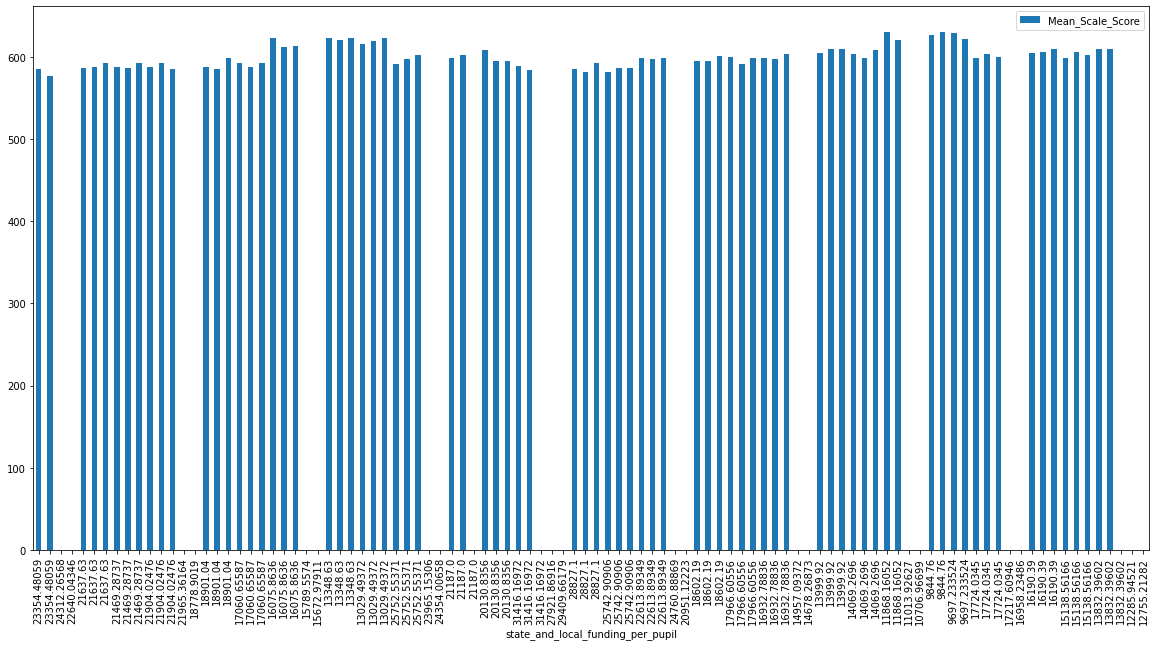

In [13]:
#graph = combined_graph.head(5) #call 6.1 function because code is writen within the function
#graph = graph.plot.bar( figsize=(15, 10))
combined.sort_values(by="fiscal_year", ascending=True)
#school_funding_and_mean_score= combined.groupby(["fiscal_year", "total_school_funding_per_pupil","Mean_Scale_Score"])
graph1 = combined.head(100)
graph1.plot(x="state_and_local_funding_per_pupil" ,y=["Mean_Scale_Score"], kind="bar", figsize=(20, 10))

#combined.plot.scatter(x ='Year', y = 'total_school_funding_per_pupil',  ylim=(100, 3000))


**Summary**
Overall, when the total school per pupil and Mean scale score is compared based on the fiscal year in a graph 1, it seems the funding seems to have little effect on the mean score.

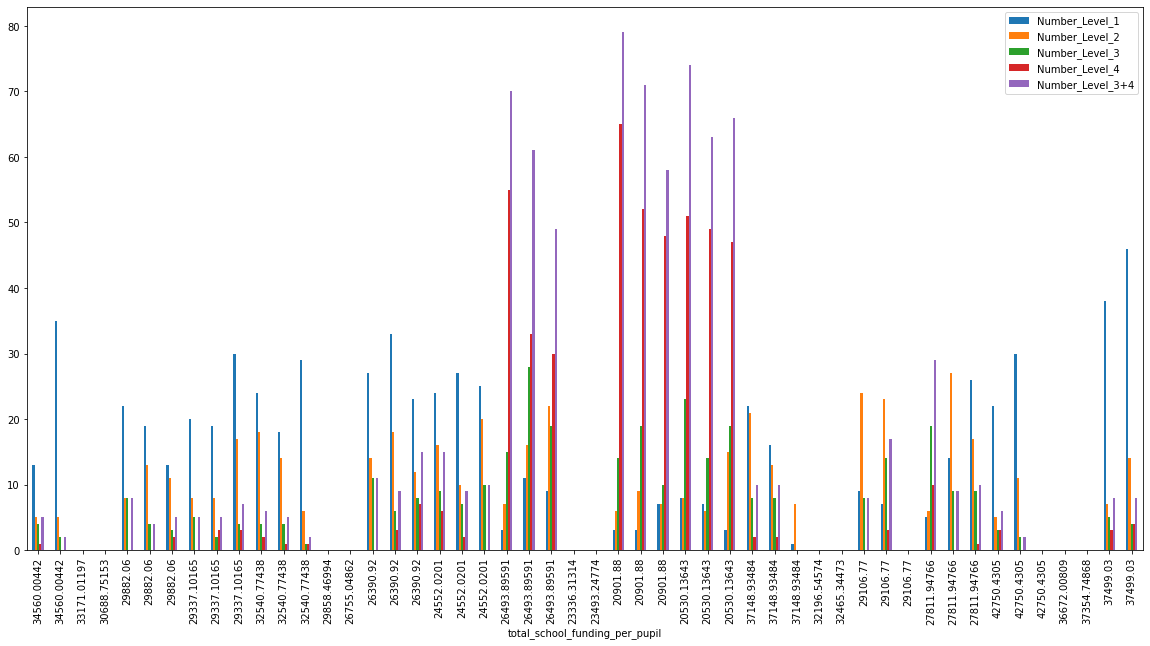

In [14]:
combined.sort_values(by="total_school_funding_per_pupil", ascending=False)
graph2 = combined.head(50)
graph2 = graph2.plot(x="total_school_funding_per_pupil", y=["Number_Level_1", "Number_Level_2", "Number_Level_3", "Number_Level_4", "Number_Level_3+4"],kind="bar", figsize=(20, 10))

**Summary**
When the different level scores are combared on how the total school funding per pupil affects the different
level of scores on graph2, it doesnt seem to have an effect since the number of students who scored on level 4,
and level 3+4 are from schol who received low fundings 

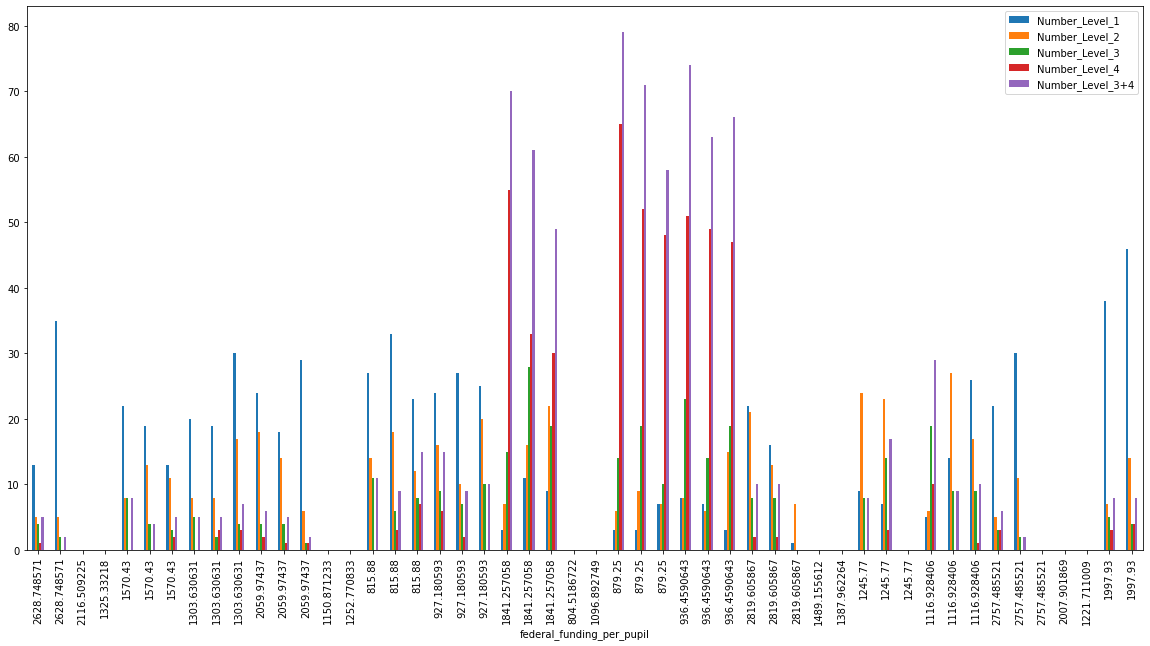

In [15]:
combined.sort_values(by="federal_funding_per_pupil", ascending=False)
graph2 = combined.head(50)
graph2 = graph2.plot(x="federal_funding_per_pupil", y=["Number_Level_1", "Number_Level_2", "Number_Level_3", "Number_Level_4", "Number_Level_3+4"],kind="bar", figsize=(20, 10))

**Summary**
When the different level scores are combared on how the total federal funding per pupil affects the different
level of scores on graph2, it doesnt seem to have an effect since the number of students who scored on level 4,
and level 3+4 are from schol who received low fundings 